# Pymaceuticals Inc.
---

### Analysis

1. Out of the 4 selected treatments (Ceftamin, Capomulin, Infubinol, Ramicane), Infubinol looks to be both the least effective and the treatment with the most variation, even presenting outliers.

2. Both Infubinol and Ceftamin treatments show growth in tumor volume over time.

3. Treatment Propriva shows about 2/3 of the Timepoints of Capomulin or Ramicane. This might lead to more variation in the dataset.
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"]) 

# Display the data table for preview
study_data_complete_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [26]:
# Checking the number of mice.
study_data_complete_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_c_unique = study_data_complete_df["Mouse ID"].unique()
study_data_c_unique

study_data_group_df = study_data_complete_df.groupby('Mouse ID')['Timepoint'].count()

study_data_group_df.head(10)

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
a401    10
a411    10
a444    10
a457     3
a492    10
Name: Timepoint, dtype: int64

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_f = study_data_complete_df.sort_values("Timepoint").drop_duplicates('Mouse ID', keep='last').reset_index()        # drops duplicated rows from the "Mouse ID" column
study_data_f


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,182,u153,0,45.000000,0,Ceftamin,Female,11,25
1,155,l872,0,45.000000,0,Placebo,Male,19,30
2,135,d133,0,45.000000,0,Zoniferol,Male,5,30
3,222,t573,0,45.000000,0,Ceftamin,Female,15,27
4,194,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...,...
244,1798,c766,45,69.823146,4,Placebo,Female,13,26
245,1797,y793,45,31.896238,2,Capomulin,Male,17,17
246,1796,h246,45,74.104086,2,Ketapril,Male,13,30
247,1794,a685,45,66.083066,3,Infubinol,Male,8,30


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_f = study_data_complete_df.sort_values("Timepoint").drop_duplicates('Mouse ID', keep='last').reset_index()        # drops duplicated rows from the "Mouse ID" column
study_data_f


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,182,u153,0,45.000000,0,Ceftamin,Female,11,25
1,155,l872,0,45.000000,0,Placebo,Male,19,30
2,135,d133,0,45.000000,0,Zoniferol,Male,5,30
3,222,t573,0,45.000000,0,Ceftamin,Female,15,27
4,194,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...,...
244,1798,c766,45,69.823146,4,Placebo,Female,13,26
245,1797,y793,45,31.896238,2,Capomulin,Male,17,17
246,1796,h246,45,74.104086,2,Ketapril,Male,13,30
247,1794,a685,45,66.083066,3,Infubinol,Male,8,30


In [30]:
# Checking the number of mice in the clean DataFrame.
study_data_f.count()

index                 249
Mouse ID              249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
dtype: int64

## Summary Statistics

In [31]:
# Generating the data from Unique Drug Regimens
unique_regimen = study_data_f["Drug Regimen"].unique()

unique_regimen

array(['Ceftamin', 'Placebo', 'Zoniferol', 'Propriva', 'Ketapril',
       'Naftisol', 'Stelasyn', 'Infubinol', 'Ramicane', 'Capomulin'],
      dtype=object)

In [32]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
unique_drug_m = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean().to_frame('Mean').reset_index()
unique_drug_s = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].std().to_frame('Standard Deviation').reset_index()
unique_drug_v = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].var().to_frame('Variance').reset_index()
unique_drug_S = study_data_f.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem().to_frame('SEM').reset_index()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.merge(pd.merge(pd.merge(unique_drug_m, unique_drug_s, on=["Drug Regimen"]), unique_drug_v, on=["Drug Regimen"]), unique_drug_S, on=["Drug Regimen"])
drug_summary_df


,Drug Regimen,Mean,Standard Deviation,Variance,SEM
0,Capomulin,36.667568,5.715188,32.663378,1.143038
1,Ceftamin,57.753977,8.365568,69.982735,1.673114
2,Infubinol,58.178246,8.602957,74.010875,1.720591
3,Ketapril,62.806191,9.945920,98.921330,1.989184
4,Naftisol,61.205757,10.297083,106.029927,2.059417
5,Placebo,60.508414,8.874672,78.759797,1.774934
6,Propriva,56.736964,8.327605,69.349002,1.665521
7,Ramicane,36.191390,5.671539,32.166354,1.134308
8,Stelasyn,61.001707,9.504293,90.331586,1.940056
9,Zoniferol,59.181258,8.767099,76.862027,1.753420


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
# Removes the string column.
drug_summary_f_df = drug_summary_df.drop(["Drug Regimen"], axis = 1)

# Creates the agg of the summary statistics
drug_summary_agg = drug_summary_f_df.agg("mean", axis = 'rows')


# sets axi to output the df in a nicer fashion
drug_summary_agg_df = drug_summary_agg.to_frame()
drug_summary_agg_df = drug_summary_agg_df.set_axis(["Value"], axis=1)

# Using the aggregation method, produce the same summary statistics in a single line.
drug_summary_agg_df.head(10)

,Value
Mean,55.023147
Standard Deviation,8.407193
Variance,72.907701
SEM,1.685358


## Bar and Pie Charts

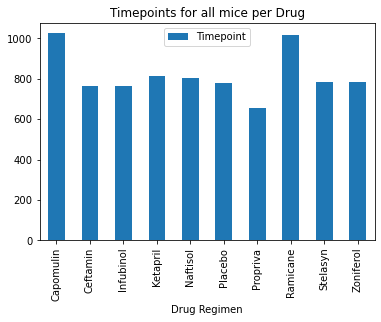

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_per_drug = study_data_f.groupby('Drug Regimen')['Timepoint'].sum()
tpd = ['Timepoint']
tp_per_drug = pd.DataFrame(tp_per_drug)

tp_per_drug.reset_index(inplace=True)      #Turns the index into a column. 
tp_per_drug = tp_per_drug.rename(columns = {'index':'Drug Regimen'})

# To create a Dataframe with the drug Regimen and the tp per drug regimen
tp_per_drug.head(20).plot(kind = 'bar', x='Drug Regimen', y ='Timepoint', title = "Timepoints for all mice per Drug")


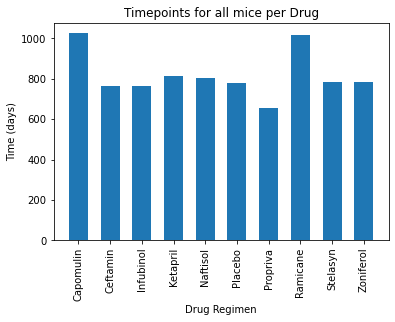

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(tp_per_drug['Drug Regimen'], tp_per_drug['Timepoint'], width = .6)
plt.title("Timepoints for all mice per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Time (days)")
plt.xticks(rotation = 90)

plt.show()


In [36]:
# Creat the dataset to extract the pie plots from. 
sex = study_data_f.groupby('Sex').count()
del sex['Mouse ID'], sex["Timepoint"], sex['Tumor Volume (mm3)'], sex['Metastatic Sites'], sex['Drug Regimen'], sex['Age_months']
sex = sex.rename(columns = {'Weight (g)':'Count'})
sex.reset_index(inplace=True)       #turns index into column! useful for turning columns into other data
sex = sex.set_index('Sex')          #sets index to 'Sex' for pie plots '
sex

,index,Count
Sex,,
Female,124,124
Male,125,125


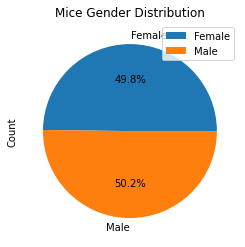

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plot = sex.plot.pie(y='Count', autopct='%1.1f%%', title = 'Mice Gender Distribution')

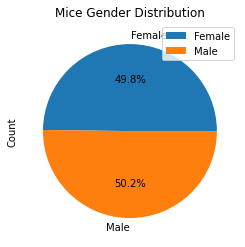

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pY = sex['Count']
pTitle = "Mice Gender Distribution"
pLabels =['Female', 'Male']
plt.pie(pY, labels = pLabels, autopct='%1.1f%%')
plt.title(pTitle)
plt.ylabel('Count')
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
study_data_final_tumor_vol = study_data_f[study_data_f['Drug Regimen'] != 'Placebo']
study_data_final_tumor_vol1 = study_data_final_tumor_vol[study_data_f['Drug Regimen'] != 'Propriva']
study_data_final_tumor_vol2 = study_data_final_tumor_vol1[study_data_f['Drug Regimen'] != 'Stelasyn']
study_data_final_tumor_vol3 = study_data_final_tumor_vol2[study_data_f['Drug Regimen'] != 'Zoniferol']
study_data_final_tumor_vol4 = study_data_final_tumor_vol3[study_data_f['Drug Regimen'] != 'Ketapril']

# Start by getting the last (greatest) timepoint for each mouse
study_data_final_tumor = study_data_final_tumor_vol.groupby('Mouse ID')["Tumor Volume (mm3)"].max().to_frame('Final TV').reset_index()
study_data_final_tumor


c:\Users\Mikam\conda4class\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\Users\Mikam\conda4class\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\Users\Mikam\conda4class\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\Mikam\conda4class\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Mouse ID,Final TV
0,a203,67.973419
1,a251,65.525743
2,a275,62.999356
3,a366,63.440686
4,a401,66.794156
...,...,...
219,z435,48.710661
220,z578,30.638696
221,z581,62.754451
222,z795,65.741070


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Infubinol", "Ceftamin", "Ramicane"]

# Setting up Dataframe for IQR/Bounds
study_data_final_tumor_vol_CAP = study_data_f[study_data_f['Drug Regimen'] == "Capomulin"]
study_data_final_tumor_vol_INF = study_data_f[study_data_f['Drug Regimen'] == "Infubinol"]
study_data_final_tumor_vol_CEF = study_data_f[study_data_f['Drug Regimen'] == "Ceftamin"]
study_data_final_tumor_vol_RAM = study_data_f[study_data_f['Drug Regimen'] == "Ramicane"]

capcol = study_data_final_tumor_vol_CAP['Tumor Volume (mm3)']
infcol = study_data_final_tumor_vol_INF['Tumor Volume (mm3)']
cefcol = study_data_final_tumor_vol_CEF['Tumor Volume (mm3)']
ramcol = study_data_final_tumor_vol_RAM['Tumor Volume (mm3)']

capcolw = study_data_final_tumor_vol_CAP['Weight (g)']   #for later

tumor_dict = {treatments[0] : capcol, treatments[1] : infcol, treatments[2] : cefcol, treatments[3] : ramcol}

tumor_vol_final = pd.DataFrame(data=tumor_dict)
tumor_vol_final.head(10)
    

,Capomulin,Infubinol,Ceftamin,Ramicane
0,NaN,NaN,45.000000,NaN
3,NaN,NaN,45.000000,NaN
4,NaN,NaN,45.000000,NaN
6,NaN,NaN,45.000000,NaN
12,NaN,36.321346,NaN,NaN
13,NaN,NaN,NaN,43.166373
14,NaN,46.250112,NaN,NaN
16,NaN,NaN,47.784682,NaN
18,NaN,47.010364,NaN,NaN
19,NaN,45.699331,NaN,NaN


In [41]:
# Check quartiles to make sure
tumor_vol_final.describe()

,Capomulin,Infubinol,Ceftamin,Ramicane
count,25.000000,25.000000,25.000000,25.000000
mean,36.667568,58.178246,57.753977,36.191390
std,5.715188,8.602957,8.365568,5.671539
min,23.343598,36.321346,45.000000,22.050126
25%,32.377357,54.048608,48.722078,31.560470
50%,38.125164,60.165180,59.851956,36.561652
75%,40.159220,65.525743,64.299830,40.659006
max,47.685963,72.226731,68.923185,45.220869


In [42]:
#IQR in order of 'treatments'
#list made from describe()
QoneM = [32.377357, 54.048608, 48.722078, 31.560470]
QtwoM = [38.125165, 60.165180, 59.851956, 36.561652]
QthrM = [40.159220, 65.525743, 64.299830, 40.659006]
IQR = []
Loutlierbounds = []
Houtlierbounds = []
for _ in range(0,4):                 #for all 4 treatments
    IQR.append(QthrM[_] - QoneM[_])    # Calculates and appends all IQRs
    Loutlierbounds.append((QoneM[_]) - (1.5*IQR[_]))       #creates lower Outlier bound
    Houtlierbounds.append((QthrM[_]) + (1.5*IQR[_]))       #creates higher Outlier bound
    
Loutlierbounds

[20.704562500000012, 36.832905499999995, 25.35545000000001, 17.912666]

In [43]:
#Calculates all Outlier points, separated into individual Dataframes.

for _ in treatments:
    if(_ == treatments[0]):
        CapLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[0]])
        CapHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[0]])
    if(_ == treatments[1]):
        InfLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[1]])
        InfHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[1]])
    if(_ == treatments[2]):
        CefLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[2]])
        CefHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[2]])
    if(_ == treatments[3]):
        RamLOutliers = (tumor_vol_final[tumor_vol_final[_] < Loutlierbounds[3]])
        RamHOutliers = (tumor_vol_final[tumor_vol_final[_] > Houtlierbounds[3]])
    
InfLOutliers

,Capomulin,Infubinol,Ceftamin,Ramicane
12,NaN,36.321346,NaN,NaN


<function matplotlib.pyplot.show(*args, **kw)>

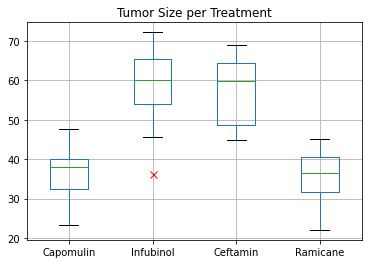

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='x', markerfacecolor='w', markersize=7, linestyle='none', markeredgecolor='r') 

#Adds the data from the dataframe
tumor_vol_final.boxplot(column=treatments, flierprops=flierprops)

#Sets the Title 
plt.title('Tumor Size per Treatment')
plt.show

## Line and Scatter Plots

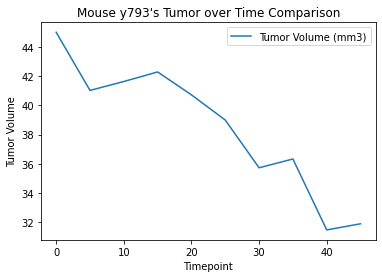

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse ID, y793
cmouse = study_data_complete_df[study_data_complete_df['Mouse ID'] == 'y793']

ypointone = cmouse['Tumor Volume (mm3)']
xpoints = cmouse['Timepoint']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.plot(xpoints, ypointone)
plt.title("Mouse y793's Tumor over Time Comparison")
plt.legend(['Tumor Volume (mm3)'])

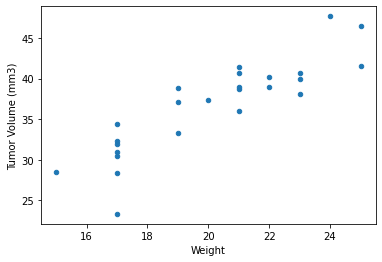

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = pd.DataFrame(capcol)
capcolw.to_frame("Weight")


Capomulin = Capomulin.assign(Weight = capcolw)
Capomulin.plot.scatter('Weight','Tumor Volume (mm3)')


## Correlation and Regression

In [47]:
# Calculate the correlation coefficient
Capomulin.corr()

,Tumor Volume (mm3),Weight
Tumor Volume (mm3),1.000000,0.876706
Weight,0.876706,1.000000


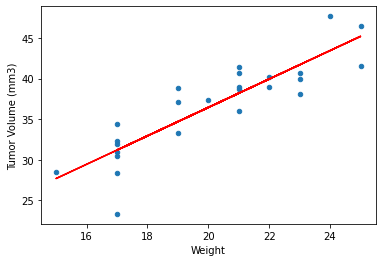

In [48]:
# Calculate the linear regression model 

x = Capomulin.iloc[:, 1].values.reshape(-1, 1)
y = Capomulin.iloc[:, 0].values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin.plot.scatter('Weight','Tumor Volume (mm3)')
plt.plot(x, y_pred, color='red')
